In [14]:
import numpy as np
import pandas as pd
import scipy.linalg

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

import sys
print(sys.version)
sys.path.append('../')

from models.powertrain.bounded_powertrain import Bounded_powertrain
from models.kinematic.ideal_diff_drive import Ideal_diff_drive
from models.kinematic.ICR_based import *
from models.kinematic.Perturbed_unicycle import *
from models.kinematic.enhanced_kinematic import *


from util.transform_algebra import *
from util.util_func import *

from sklearn import linear_model

3.10.6 (main, Mar 10 2023, 10:55:28) [GCC 11.3.0]


In [15]:
# import slip dataset

dataset_path = '../data/ral2023_dataset/husky/boreal_snow/slip_dataset_all.pkl'

full_dataset = pd.read_pickle(dataset_path)
full_dataset_length = len(full_dataset)
train_dataset = full_dataset[:int(full_dataset_length/2)]
validate_dataset = full_dataset[int(full_dataset_length/2):]

print(train_dataset)

     init_icp_x  init_icp_y  init_icp_z  init_icp_roll  init_icp_pitch  \
0           0.0         0.0         0.0            0.0             0.0   
1           0.0         0.0         0.0            0.0             0.0   
2           0.0         0.0         0.0            0.0             0.0   
3           0.0         0.0         0.0            0.0             0.0   
4           0.0         0.0         0.0            0.0             0.0   
..          ...         ...         ...            ...             ...   
296         0.0         0.0         0.0            0.0             0.0   
297         0.0         0.0         0.0            0.0             0.0   
298         0.0         0.0         0.0            0.0             0.0   
299         0.0         0.0         0.0            0.0             0.0   
300         0.0         0.0         0.0            0.0             0.0   

     init_icp_yaw  calib_step  cmd_left_0  cmd_right_0  cmd_left_1  ...  \
0             0.0         0.0    6.5

In [16]:
# import powertrain vels

cmd_left_str_list = []
cmd_right_str_list = []
for i in range(0, 40):
    str_cmd_left_i = 'cmd_left_' + str(i)
    str_cmd_right_i = 'cmd_right_' + str(i)
    cmd_left_str_list.append(str_cmd_left_i)
    cmd_right_str_list.append(str_cmd_right_i)
cmd_left_vels_array = full_dataset[cmd_left_str_list].to_numpy()
cmd_right_vels_array = full_dataset[cmd_right_str_list].to_numpy()

encoder_left_str_list = []
encoder_right_str_list = []
for i in range(0, 40):
    str_encoder_left_i = 'left_wheel_vel_' + str(i)
    str_encoder_right_i = 'right_wheel_vel_' + str(i)
    encoder_left_str_list.append(str_encoder_left_i)
    encoder_right_str_list.append(str_encoder_right_i)
encoder_left_vels_array = full_dataset[encoder_left_str_list].to_numpy()
encoder_right_vels_array = full_dataset[encoder_right_str_list].to_numpy()

transitory_left_str_list = []
transitory_right_str_list = []
for i in range(0, 40):
    str_transitory_left_i = 'transitory_vel_left_' + str(i)
    str_transitory_right_i = 'transitory_vel_right_' + str(i)
    transitory_left_str_list.append(str_transitory_left_i)
    transitory_right_str_list.append(str_transitory_right_i)
transitory_left_vels_array = full_dataset[transitory_left_str_list].to_numpy()
transitory_right_vels_array = full_dataset[transitory_right_str_list].to_numpy()

print(cmd_left_vels_array.shape)

(603, 40)


Text(0, 0.5, 'wheel velocity [rad/s]')

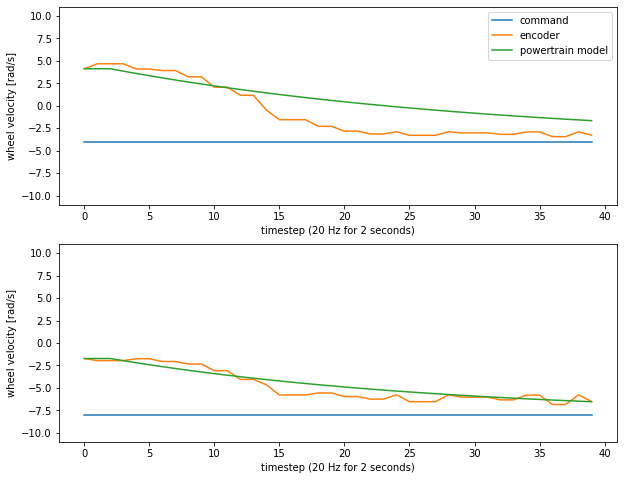

In [62]:
# plot powertrain vels

fig, axs = plt.subplots(2, figsize=(10,8))

window_id = 180

axs[0].plot(cmd_left_vels_array[window_id, :], label='command')
axs[0].plot(encoder_left_vels_array[window_id, :], label='encoder')
axs[0].plot(transitory_left_vels_array[window_id, :], label='powertrain model')
axs[0].set_ylim(-11, 11)
axs[0].set_ylabel('wheel velocity [rad/s]')
axs[0].set_xlabel('timestep (20 Hz for 2 seconds)')
axs[0].legend()

axs[1].plot(cmd_right_vels_array[window_id, :])
axs[1].plot(encoder_right_vels_array[window_id, :])
axs[1].plot(transitory_right_vels_array[window_id, :])
axs[1].set_ylim(-11, 11)
axs[1].set_xlabel('timestep (20 Hz for 2 seconds)')
axs[1].set_ylabel('wheel velocity [rad/s]')